# Step-by-Step Feature Analysis and Visualization for Classification Problem

The target variable is the last column in the `data` DataFrame. We will:
1. Split the data into features and target.
2. Perform correlation analysis.
3. Compute mutual information.
4. Calculate feature importance using Random Forest.
5. Visualize results from each method.

---

## 1. Split Features and Target

In [1]:
import pandas as pd
data=pd.read_csv('cleaned_weather_data.csv')
data['Rain_tomorrow'] =data['Rain'].shift(-1).apply(lambda x: 1 if x > 0 else 0)
data = data.drop(data.index[-1])

In [2]:
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column

C:\Users\mohan\AppData\Local\Temp\ipykernel_1284\2115544478.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_sorted.values, y=correlations_sorted.index, palette='viridis')


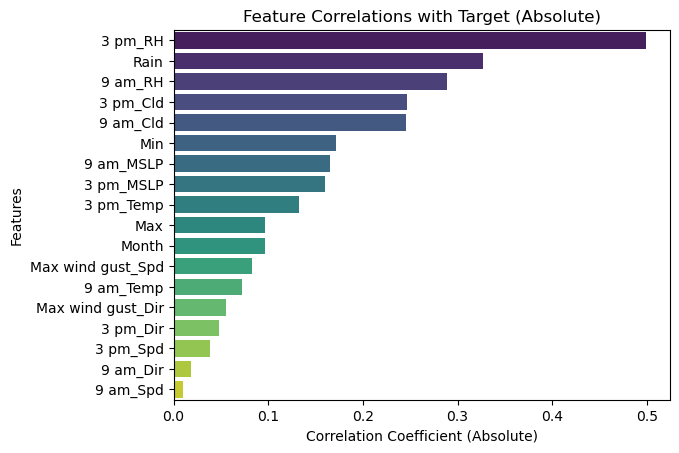

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation of features with the target
correlations = X.corrwith(y).abs()  # Use absolute correlation
correlations_sorted = correlations.sort_values(ascending=False)

# Visualize correlations
sns.barplot(x=correlations_sorted.values, y=correlations_sorted.index, palette='viridis')
plt.title('Feature Correlations with Target (Absolute)')
plt.xlabel('Correlation Coefficient (Absolute)')
plt.ylabel('Features')
plt.show()

C:\Users\mohan\AppData\Local\Temp\ipykernel_1284\285143661.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual Information', y='Feature', data=mi_df, palette='viridis')


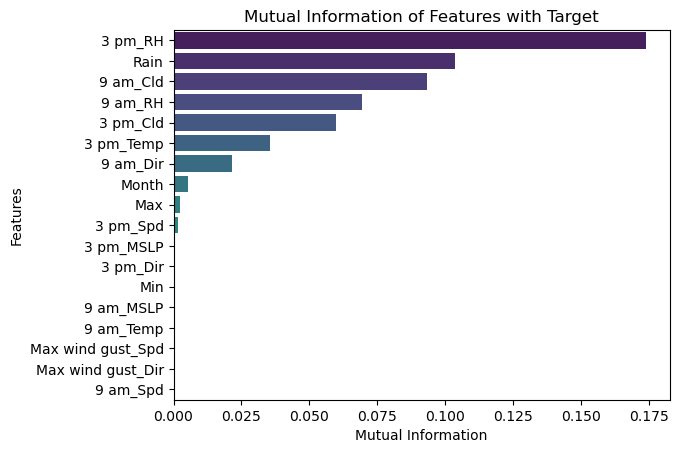

In [6]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information
mi = mutual_info_classif(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
mi_df.sort_values(by='Mutual Information', ascending=False, inplace=True)

# Visualize mutual information
sns.barplot(x='Mutual Information', y='Feature', data=mi_df, palette='viridis')
plt.title('Mutual Information of Features with Target')
plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.show()

C:\Users\mohan\AppData\Local\Temp\ipykernel_1284\192725517.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


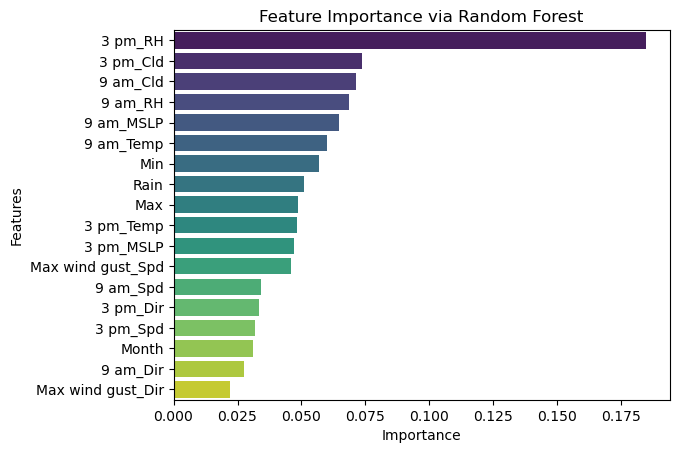

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Compute feature importance
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Visualize feature importance
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance via Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

              Feature  Correlation  Mutual Information  \
12            3 pm_RH     0.498764            0.173932   
13           3 pm_Cld     0.246811            0.059747   
7            9 am_Cld     0.245022            0.093462   
6             9 am_RH     0.288975            0.069283   
10          9 am_MSLP     0.164895            0.000000   
5           9 am_Temp     0.072111            0.000000   
0                 Min     0.171885            0.000000   
2                Rain     0.326751            0.103490   
1                 Max     0.096593            0.002308   
11          3 pm_Temp     0.132258            0.035601   
16          3 pm_MSLP     0.159912            0.000000   
4   Max wind gust_Spd     0.082879            0.000000   
9            9 am_Spd     0.010050            0.000000   
14           3 pm_Dir     0.048509            0.000000   
15           3 pm_Spd     0.038511            0.001673   
17              Month     0.096280            0.005364   
8            9

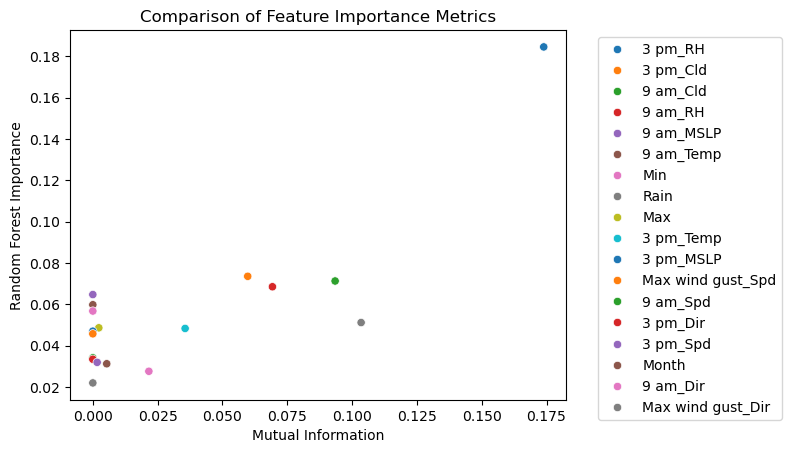

In [10]:
# Combine results into a single DataFrame for comparison
combined_results = pd.DataFrame({
    'Feature': X.columns,
    'Correlation': correlations.values,
    'Mutual Information': mi,
    'Random Forest Importance': feature_importances
})

# Sort by Random Forest Importance
combined_results.sort_values(by='Random Forest Importance', ascending=False, inplace=True)
print(combined_results)

# Visualize combined results (e.g., Mutual Information vs. Random Forest Importance)
sns.scatterplot(
    x='Mutual Information', 
    y='Random Forest Importance', 
    hue='Feature', 
    data=combined_results, 
    palette='tab10'
)
plt.title('Comparison of Feature Importance Metrics')
plt.xlabel('Mutual Information')
plt.ylabel('Random Forest Importance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()